<a href="https://colab.research.google.com/github/YingAnalytics/YouTube_Trending_Videos_Analysis/blob/main/(SQL)YouTube_Trending_videos_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Project: U.S and Japan YouTube Trending videos Exploratory Analysis </h1> <br>

Team Members: Maraline Torres, Ying Zhang, Bruce Hou, Yuting Gong, Yujia Cao <br>
Programming Language: SQL




## Project objective: 
    
Our goal is to analyze US and Japan YouTube trending videos and present how the video categories and country culture correlate with the video’s popularity in 2018 and 2020. 
We will analyze the characteristics, including categories, view, likes count and trending time (season/weekday/month), in trending 
videos to identify changes in preference. 

## Data source:

Initially, we had four different tables with the videos information and two tables that contain the video categories information. 


`ba775-team-6a.youtube.US_youtube_trending_data`,
`ba775-team-6a.youtube.US_youtube_trending_data_past`,
`ba775-team-6a.youtube.JP_youtube_trending_data`,
`ba775-team-6a.youtube.JP_youtube_trending_data_past`,
`ba775-team-6a.youtube.US_video_categories`,
`ba775-team-6a.youtube.JP_video_categories`

We decided to put all the information in one table which is the one that we used in our queries and visualizations:

`ba775-team-6a.youtube.Youtube_trending_videos`

## Tableau Story  <br>

In addition to the following exploratory analysis using SQL, our team also created different dashaboards and put it all together in a story. Please feel free to use the following link to access our story: 

https://public.tableau.com/profile/maraline.torres#!/vizhome/BA775-FinalProject/Story-FinalProject?publish=yes

## Reference to datasource:

This datasource was collected using the Youtube  and it presents a list of the top trending videos on the platform. To determine the year's top-trending videos, Youtube uses a combination of factors such as number of views, shares, comments and likes. We accessed the datasources via Kaggle data notebooks  "Trending Yotube Video Statistics" and "YouTube Trending Video Dataset".

Links: 

https://www.kaggle.com/datasnaek/youtube-new

https://www.kaggle.com/rsrishav/youtube-trending-video-dataset
    

## Get to know the dataset

In [ ]:
%%bigquery

##Total records in our dataset
SELECT 
  COUNT(*) as Total_records
FROM `ba775-team-6a.youtube.Youtube_trending_videos` 

,Total_records
0,71868


In [ ]:
%%bigquery

##Total records in each country
SELECT 
  Country,
  EXTRACT(year from publishedat) AS YEAR,
  COUNT(*) as Total_records
FROM `ba775-team-6a.youtube.Youtube_trending_videos` 
GROUP BY
  Country,
  YEAR
ORDER BY
  Country, YEAR DESC

,Country,YEAR,Total_records
0,Japan,2020,13997
1,Japan,2018,14843
2,United States,2020,12797
3,United States,2018,30231


In [ ]:
%%bigquery

##How many video categories in each country
SELECT 
  Country,
  COUNT(DISTINCT categoryid) as Total_categories
FROM `ba775-team-6a.youtube.Youtube_trending_videos` 
GROUP BY
  Country
ORDER BY
  Country DESC

,Country,Total_categories
0,United States,16
1,Japan,15


In [ ]:
%%bigquery

##Info about the published date
SELECT 
  Country,
  EXTRACT(year from publishedat) AS YEAR,
  COUNT(DISTINCT EXTRACT(date FROM publishedat)) AS COUNT_DATE,
  MIN(EXTRACT(date FROM publishedat)) AS MIN_DATE,
  MAX(EXTRACT(date FROM publishedat)) AS MAX_DATE
FROM `ba775-team-6a.youtube.Youtube_trending_videos` 
GROUP BY
  Country, YEAR
ORDER BY
  YEAR DESC

,Country,YEAR,COUNT_DATE,MIN_DATE,MAX_DATE
0,Japan,2020,77,2020-08-04,2020-10-19
1,United States,2020,72,2020-08-03,2020-10-14
2,Japan,2018,132,2018-01-05,2018-06-13
3,United States,2018,165,2018-01-01,2018-06-14


In [ ]:
%%bigquery

##Info about the trending_date
SELECT 
  Country,
  EXTRACT(year from trending_date) AS YEAR,
  COUNT(DISTINCT EXTRACT(date FROM trending_date)) AS COUNT_DATE,
  MIN(EXTRACT(date FROM trending_date)) AS MIN_DATE,
  MAX(EXTRACT(date FROM trending_date)) AS MAX_DATE
FROM `ba775-team-6a.youtube.Youtube_trending_videos` 
GROUP BY
  Country, YEAR
ORDER BY
  YEAR DESC

,Country,YEAR,COUNT_DATE,MIN_DATE,MAX_DATE
0,Japan,2020,70,2020-08-12,2020-10-20
1,United States,2020,64,2020-08-12,2020-10-14
2,Japan,2018,122,2018-02-07,2018-06-14
3,United States,2018,156,2018-01-02,2018-06-14


## General Questions:

#### 1.	What are the top 5 most popular video categories in United States for 2018 and 2020?

In [ ]:
%%bigquery
WITH us_top_videos AS
(

  SELECT category_id, year_published,
    (ROW_NUMBER() OVER(Partition by year_published
            ORDER BY view_count DESC)) AS Count_row
  FROM
  (
      SELECT DISTINCT US_videos_past.category_Id,
        SUM(US_videos_past.views) AS view_count,
        EXTRACT(year FROM US_videos_past.publish_time) AS year_published
      FROM `ba775-team-6a.youtube.US_youtube_trending_data_past` AS US_videos_past
      WHERE
      EXTRACT(year FROM US_videos_past.publish_time) = 2018
    GROUP BY
      category_Id,
      year_published
    ORDER BY
      view_count DESC
   )
   UNION ALL
   SELECT categoryid, year_published,
    (ROW_NUMBER() OVER(Partition by year_published
            ORDER BY view_count DESC)) AS Count_row
  FROM
  (
      SELECT DISTINCT US_videos.categoryId,
        SUM(US_videos.view_count) AS view_count,
        EXTRACT(year FROM US_videos.publishedat) AS year_published
      FROM `ba775-team-6a.youtube.US_youtube_trending_data` AS US_videos
      WHERE
      EXTRACT(year FROM US_videos.publishedat) = 2020
    GROUP BY
      categoryId,
      year_published
    ORDER BY
      view_count DESC
   )
 ) 
 SELECT category_id, video_categories.title, year_published
 FROM us_top_videos
 INNER JOIN `ba775-team-6a.youtube.US_video_categories` AS video_categories
  ON category_id = video_categories.id
 WHERE
  count_row >=1 and count_row <=5
 ORDER BY
  year_published DESC

,category_id,title,year_published
0,10,Music,2020
1,24,Entertainment,2020
2,20,Gaming,2020
3,17,Sports,2020
4,22,People & Blogs,2020
5,10,Music,2018
6,24,Entertainment,2018
7,1,Film & Animation,2018
8,22,People & Blogs,2018
9,17,Sports,2018


#### 2.	What are the top 5 most popular video categories in Japan for 2018 and 2020?

In [ ]:
%%bigquery
WITH JP_top_videos AS
(

  SELECT category_id, year_published,
    (ROW_NUMBER() OVER(Partition by year_published
            ORDER BY view_count DESC)) AS Count_row
  FROM
  (
      SELECT DISTINCT JP_videos_past.category_Id,
        SUM(JP_videos_past.views) AS view_count,
        EXTRACT(year FROM JP_videos_past.publish_time) AS year_published
      FROM `ba775-team-6a.youtube.JP_youtube_trending_data_past` AS JP_videos_past
      WHERE
      EXTRACT(year FROM JP_videos_past.publish_time) = 2018  
    GROUP BY
      category_Id,
      year_published
    ORDER BY
      view_count DESC)
      
   UNION ALL
   SELECT categoryid, year_published,
    (ROW_NUMBER() OVER(Partition by year_published
            ORDER BY view_count DESC)) AS Count_row
    FROM
    (
        SELECT DISTINCT JP_videos.categoryId,
          SUM(JP_videos.view_count) AS view_count,
          EXTRACT(year FROM JP_videos.publishedat) AS year_published
        FROM `ba775-team-6a.youtube.JP_youtube_trending_data` AS JP_videos
        WHERE
        EXTRACT(year FROM JP_videos.publishedat) = 2020
      GROUP BY
        categoryId,
        year_published
      ORDER BY
        view_count DESC
     )
 ) 
 SELECT category_id, video_categories.title, year_published
 FROM JP_top_videos
 INNER JOIN `ba775-team-6a.youtube.JP_video_categories` AS video_categories
  ON category_id = video_categories.id
 WHERE
  count_row >=1 and count_row <=5
 ORDER BY
  year_published DESC

,category_id,title,year_published
0,10,Music,2020
1,24,Entertainment,2020
2,22,People & Blogs,2020
3,23,Comedy,2020
4,20,Gaming,2020
5,24,Entertainment,2018
6,10,Music,2018
7,22,People & Blogs,2018
8,17,Sports,2018
9,1,Film & Animation,2018


### Top 5 Categories in Each Country at 2018 and 2020

In [ ]:
%%bigquery
WITH us_top_videos AS
(

  SELECT category_id, year_published,
    (ROW_NUMBER() OVER(Partition by year_published
            ORDER BY view_count DESC)) AS Count_row
  FROM
  (
      SELECT DISTINCT US_videos_past.category_Id,
        SUM(US_videos_past.views) AS view_count,
        EXTRACT(year FROM US_videos_past.publish_time) AS year_published
      FROM `ba775-team-6a.youtube.US_youtube_trending_data_past` AS US_videos_past
      WHERE
      EXTRACT(year FROM US_videos_past.publish_time) = 2018
    GROUP BY
      category_Id,
      year_published
    ORDER BY
      view_count DESC
   )
   UNION ALL
   SELECT categoryid, year_published,
    (ROW_NUMBER() OVER(Partition by year_published
            ORDER BY view_count DESC)) AS Count_row
  FROM
  (
      SELECT DISTINCT US_videos.categoryId,
        SUM(US_videos.view_count) AS view_count,
        EXTRACT(year FROM US_videos.publishedat) AS year_published
      FROM `ba775-team-6a.youtube.US_youtube_trending_data` AS US_videos
      WHERE
      EXTRACT(year FROM US_videos.publishedat) = 2020
    GROUP BY
      categoryId,
      year_published
    ORDER BY
      view_count DESC
   )
 ) 
 SELECT category_id, video_categories.title, year_published
 FROM us_top_videos
 INNER JOIN `ba775-team-6a.youtube.US_video_categories` AS video_categories
  ON category_id = video_categories.id
 WHERE
  count_row >=1 and count_row <=5
 ORDER BY
  year_published DESC


,category_id,title,year_published
0,10,Music,2020
1,24,Entertainment,2020
2,20,Gaming,2020
3,17,Sports,2020
4,22,People & Blogs,2020
5,10,Music,2018
6,24,Entertainment,2018
7,1,Film & Animation,2018
8,22,People & Blogs,2018
9,17,Sports,2018


### 3.	What are the top 10 most popular music videos for 2020?

In [ ]:
%%bigquery
SELECT   video_id,
  title,
  country
FROM(
  SELECT DISTINCT US_video_data.video_id,
    US_video_data.title,
    US_video_data.view_count AS view_count,
    'United States' AS country
  FROM `ba775-team-6a.youtube.US_youtube_trending_data` AS US_video_data
  WHERE
    US_video_data.categoryId = 10 --Music
  UNION ALL
  SELECT DISTINCT JP_video_data.video_id,
    JP_video_data.title,
    JP_video_data.view_count AS view_count,
    'Japan' AS country
  FROM `ba775-team-6a.youtube.JP_youtube_trending_data` AS JP_video_data
  WHERE
    JP_video_data.categoryId = 10 --Music
) AS A
GROUP BY
  video_id,
  title,
  country
ORDER BY
     SUM(view_count) DESC
 LIMIT 10

,video_id,title,country
0,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,Japan
1,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,United States
2,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,United States
3,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,Japan
4,dyRsYk0LyA8,BLACKPINK – ‘Lovesick Girls’ M/V,Japan
5,pvPsJFRGleA,Justin Bieber - Holy ft. Chance The Rapper,United States
6,dyRsYk0LyA8,BLACKPINK – ‘Lovesick Girls’ M/V,United States
7,oxoWhyS9buA,BTS (방탄소년단) 'Dynamite' Official Teaser,Japan
8,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,United States
9,BV2FdDmGiW0,BTS (방탄소년단) 'Dynamite' Official MV (B-side),Japan


### Top 5 Most Music Popular Videos in Each Countries

In [ ]:
%%bigquery
WITH top_videos AS
(
    SELECT 
    title, country,
    (ROW_NUMBER() OVER(Partition by country
            ORDER BY view_count DESC)) AS Count_row
    FROM(
      SELECT DISTINCT 
        US_video_data.title,
        SUM(US_video_data.view_count) AS view_count,
        Country
      FROM `ba775-team-6a.youtube.Youtube_trending_videos` AS US_video_data
      WHERE
        US_video_data.categoryId = 10 --Music
        AND Country = 'United States'
      GROUP BY
        US_video_data.title,
        Country
      ORDER BY
      view_count DESC
     )
     UNION ALL
     SELECT 
      title, country,
      (ROW_NUMBER() OVER(Partition by country
              ORDER BY view_count DESC)) AS Count_row
     FROM 
     (
      SELECT DISTINCT 
        JP_video_data.title,
        SUM(JP_video_data.view_count) AS view_count,
        Country
      FROM `ba775-team-6a.youtube.Youtube_trending_videos` AS JP_video_data
      WHERE
        JP_video_data.categoryId = 10 --Music
        AND JP_video_data.Country = 'Japan' 
      GROUP BY
        title,
        Country
      ORDER BY
        view_count DESC
        )
  )
  SELECT *
  FROM top_videos
  WHERE
    count_row >=1 and count_row <=5
   ORDER BY
    Country DESC
 

,title,country,Count_row
0,Childish Gambino - This Is America (Official V...,United States,1
1,Ariana Grande - No Tears Left To Cry,United States,2
2,BTS (방탄소년단) 'Dynamite' Official MV,United States,3
3,BTS (방탄소년단) 'FAKE LOVE' Official MV,United States,4
4,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,United States,5
5,BTS (방탄소년단) 'Dynamite' Official MV,Japan,1
6,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,Japan,2
7,BLACKPINK – ‘Lovesick Girls’ M/V,Japan,3
8,BTS (방탄소년단) 'Dynamite' Official Teaser,Japan,4
9,BTS (방탄소년단) 'Dynamite' Official MV (B-side),Japan,5


### 4.	How many videos are trending on Youtube in both Japan and US for 2018 and 2020?

In [ ]:
%%bigquery
SELECT year,
COUNT(DISTINCT video_id) AS Amount_videos
FROM
  (SELECT  
  EXTRACT(year from JP.publishedAt) AS year,
  --count(DISTINCT JP.video_id)
  JP.video_id
  FROM `ba775-team-6a.youtube.JP_youtube_trending_data` AS JP
  INNER JOIN `ba775-team-6a.youtube.US_youtube_trending_data` AS US
    ON US.video_id = JP.video_id
      AND EXTRACT(year from US.publishedat) = 2020
  WHERE EXTRACT(year from JP.publishedAt) = 2020
  UNION ALL
  SELECT  
  EXTRACT(year from JP_past.publish_time) AS year,
  JP_past.video_id
  FROM `ba775-team-6a.youtube.JP_youtube_trending_data_past` AS JP_past
  INNER JOIN `ba775-team-6a.youtube.US_youtube_trending_data_past` AS US_past
    ON US_past.video_id = JP_past.video_id
      AND EXTRACT(year from US_past.publish_time) = 2018
  WHERE EXTRACT(year from JP_past.publish_time) = 2018
  )
GROUP BY
  year
ORDER BY
  year DESC

,year,Amount_videos
0,2020,81
1,2018,140


### Total Amount of Trending Video in Both Japan and the US (Ratio)

In [ ]:
%%bigquery
with oldvideo as (select (amount_video/sum_video) as video_ratio, published_year
from
(with oldcount as (with usvideo as
(select *
from (select title, extract(year from publishedAt) as published_year, country
from `ba775-team-6a.youtube.Youtube_trending_videos`
where extract(year from publishedAt)=2018)
where country='United States')

,jpvideo as
(select *
from (select title, extract(year from publishedAt) as published_year, country
from `ba775-team-6a.youtube.Youtube_trending_videos`
where extract(year from publishedAt)=2018)
where country='Japan')

select count(u.title) as amount_video, u.published_year
from usvideo as u
inner join jpvideo as j
on u.title=j.title
group by u.published_year)

, oldsum as (select count(title) as sum_video, extract(year from publishedAt) as published_year from `ba775-team-6a.youtube.Youtube_trending_videos` where extract(year from publishedAt)=2018 group by extract(year from publishedAt))

select oc.published_year, oc.amount_video, os.sum_video
from oldsum as os
inner join oldcount as oc
on os.published_year = oc.published_year))


,newvideo as ((select (amount_video/sum_video) as video_ratio, published_year
from
(with oldcount as (with usvideo as
(select *
from (select title, extract(year from publishedAt) as published_year, country
from `ba775-team-6a.youtube.Youtube_trending_videos`
where extract(year from publishedAt)=2020)
where country='United States')

,jpvideo as
(select *
from (select title, extract(year from publishedAt) as published_year, country
from `ba775-team-6a.youtube.Youtube_trending_videos`
where extract(year from publishedAt)=2020)
where country='Japan')

select count(u.title) as amount_video, u.published_year
from usvideo as u
inner join jpvideo as j
on u.title=j.title
group by u.published_year)

, oldsum as (select count(title) as sum_video, extract(year from publishedAt) as published_year from `ba775-team-6a.youtube.Youtube_trending_videos` where extract(year from publishedAt)=2020 group by extract(year from publishedAt))

select oc.published_year, oc.amount_video, os.sum_video
from oldsum as os
inner join oldcount as oc
on os.published_year = oc.published_year)))

select *
from oldvideo
union all 
select *
from newvideo


,video_ratio,published_year
0,0.112786,2020
1,0.050162,2018


#### 5.	For the same videos trending in Japan and US, to which category they belong and how many they have?
	

In [ ]:
%%bigquery

SELECT JP.CategoryId, JP_categories.Title, COUNT(DISTINCT JP.video_id) AS Amount_videos
FROM `ba775-team-6a.youtube.Youtube_trending_videos` AS US
INNER JOIN `ba775-team-6a.youtube.Youtube_trending_videos` AS JP
  ON JP.video_id = US.video_id
    AND JP.Country = 'Japan' 
    AND EXTRACT(year from JP.publishedAt) = 2020
INNER JOIN `ba775-team-6a.youtube.JP_video_categories` AS JP_categories
  ON JP_categories.id = JP.categoryid
WHERE
  EXTRACT(year from US.publishedAt) = 2020
  AND US.Country = 'United States'
GROUP BY
  JP.categoryId, JP_categories.Title
ORDER BY
  Amount_videos DESC


,CategoryId,Title,Amount_videos
0,10,Music,43
1,20,Gaming,13
2,24,Entertainment,9
3,28,Science & Technology,5
4,23,Comedy,5
5,17,Sports,4
6,22,People & Blogs,1
7,2,Autos & Vehicles,1


#### 6.	What top 5 channels and videos have more views_counts in United States for 2018 and 2020? 

In [ ]:
%%bigquery
SELECT channelTitle,sum(view_count) as total_view FROM `ba775-team-6a.youtube.Youtube_trending_videos` 
where Country = 'United States'
group by channelTitle
order by total_view DESC
limit 5

,channelTitle,total_view
0,ChildishGambinoVEVO,3758488765
1,BLACKPINK,2538592941
2,Dude Perfect,2178557231
3,Big Hit Labels,2075636433
4,ibighit,2011897203


#### 7.	What top 5 channels and videos have more views_counts in Japan for 2018 and 2020? 

In [ ]:
%%bigquery
SELECT channelTitle,sum(view_count) as total_view FROM `ba775-team-6a.youtube.Youtube_trending_videos` 
where Country = 'Japan'
group by channelTitle
order by total_view DESC
limit 5

,channelTitle,total_view
0,Big Hit Labels,2972398551
1,BLACKPINK,2844143163
2,SMTOWN,685791056
3,JYP Entertainment,590275138
4,Apple,523728736


#### 8.	The number of comment_count, likes and dislikes per trending video in U.S for 2018 and 2020

In [ ]:
%%bigquery
SELECT
  EXTRACT(year from publishedAt) AS Year_data,
    SUM(view_count) / COUNT(DISTINCT video_id) AS avg_view_count,
        SUM(likes) /  COUNT(DISTINCT video_id) AS avg_likes,
        SUM(dislikes) /  COUNT(DISTINCT video_id) AS avg_dislikes,
        SUM(comment_count) /  COUNT(DISTINCT video_id) AS avg_comment_count
FROM `ba775-team-6a.youtube.Youtube_trending_videos` 
WHERE 
  Country = 'United States' 
GROUP BY
  Year_data

,Year_data,avg_view_count,avg_likes,avg_dislikes,avg_comment_count
0,2020,1.291017e+07,808833.090807,21517.340713,97426.533583
1,2018,2.031386e+07,622317.602746,29577.124080,69948.587543


#### 9.The number of comment_count, likes and dislikes per trending video in Japan for 2018 and 2020

In [ ]:
%%bigquery
SELECT
  EXTRACT(year from publishedAt) AS Year_data,
    SUM(view_count) / COUNT(DISTINCT video_id) AS avg_view_count,
        SUM(likes) /  COUNT(DISTINCT video_id) AS avg_likes,
        SUM(dislikes) /  COUNT(DISTINCT video_id) AS avg_dislikes,
        SUM(comment_count) /  COUNT(DISTINCT video_id) AS avg_comment_count
FROM `ba775-team-6a.youtube.Youtube_trending_videos` 
WHERE 
  Country = 'Japan' 
GROUP BY
  Year_data

,Year_data,avg_view_count,avg_likes,avg_dislikes,avg_comment_count
0,2018,2.917678e+05,9238.850957,399.044543,1315.501975
1,2020,9.104127e+06,524308.515554,14988.167429,76252.156908


#### 10) Top 10 video categories for US trending videos for 2018 and 2020

In [ ]:
%%bigquery
SELECT categoryId, video_categories.title AS video_category, SUM(view_count) AS Total_view_count
FROM (

  SELECT DISTINCT US_videos.categoryId,
      US_videos.view_count AS view_count,
      EXTRACT(year FROM US_videos.publishedAt) AS year_published
    FROM `ba775-team-6a.youtube.US_youtube_trending_data` AS US_videos
    UNION DISTINCT
    SELECT DISTINCT US_videos_past.category_Id,
      US_videos_past.views AS view_count,
      EXTRACT(year FROM US_videos_past.publish_time) AS year_published
    FROM `ba775-team-6a.youtube.US_youtube_trending_data_past` AS US_videos_past
    WHERE
      EXTRACT(year FROM US_videos_past.publish_time) = 2018  
 ) AS A
INNER JOIN `ba775-team-6a.youtube.US_video_categories` AS video_categories
  ON A.categoryId = video_categories.id
GROUP BY
  categoryId,
  video_categories.title
ORDER BY
  Total_view_count DESC
LIMIT 10

,categoryId,video_category,Total_view_count
0,10,Music,50800661303
1,24,Entertainment,22494396254
2,1,Film & Animation,7304648966
3,22,People & Blogs,6533206872
4,17,Sports,6379150544
5,20,Gaming,5475028557
6,23,Comedy,5090128761
7,28,Science & Technology,4113858198
8,26,Howto & Style,3956994502
9,25,News & Politics,1790851673


#### 11) Top 10 video categories for Japan trending videos for 2018 and 2020

In [ ]:
%%bigquery
SELECT categoryId, video_categories.title AS video_category, SUM(view_count) AS Total_view_count
FROM (
    SELECT DISTINCT JP_videos.categoryId,
      JP_videos.view_count AS view_count,
      EXTRACT(year FROM JP_videos.publishedAt) AS year_published
    FROM `ba775-team-6a.youtube.JP_youtube_trending_data` AS JP_videos
    UNION DISTINCT
    SELECT DISTINCT JP_videos_past.category_Id,
      JP_videos_past.views AS view_count,
      EXTRACT(year FROM JP_videos_past.publish_time) AS year_published
    FROM `ba775-team-6a.youtube.JP_youtube_trending_data_past` AS JP_videos_past
    WHERE
      EXTRACT(year FROM JP_videos_past.publish_time) = 2018
 ) AS A
INNER JOIN `ba775-team-6a.youtube.JP_video_categories` AS video_categories
  ON A.categoryId = video_categories.id
GROUP BY
  categoryId,
  video_categories.title
ORDER BY
  Total_view_count DESC
LIMIT 10

,categoryId,video_category,Total_view_count
0,10,Music,11011921099
1,24,Entertainment,5192488642
2,22,People & Blogs,1482275670
3,23,Comedy,1259133730
4,20,Gaming,982039959
5,17,Sports,845801662
6,1,Film & Animation,717322454
7,28,Science & Technology,637707492
8,26,Howto & Style,427940380
9,25,News & Politics,330320922


12) 	When does the US channel owner prefer to publish their videos? 

#### 13) In 2018, how many days does each video category took to go viral?

In [ ]:
%%bigquery
SELECT categoryId, 
CASE WHEN Country = 'United States' THEN US_categories.title
    WHEN Country = 'Japan' THEN JP_categories.title
END AS category_name,
SUM(DATE_DIFF(CAST(trending_date AS DATE), CAST(publishedAt AS DATE), day))/COUNT(categoryid) AS difference_days,
COUNT(categoryId) AS Total_in_category,
country
FROM `ba775-team-6a.youtube.Youtube_trending_videos` AS Youtube_tendring_videos
LEFT JOIN `ba775-team-6a.youtube.US_video_categories` AS US_categories
  ON Youtube_tendring_videos.categoryid = US_categories.id
    AND Youtube_tendring_videos.Country = 'United States' 
LEFT JOIN `ba775-team-6a.youtube.JP_video_categories` AS JP_categories
  ON Youtube_tendring_videos.categoryid = JP_categories.id
    AND Youtube_tendring_videos.Country = 'Japan' 
WHERE
  EXTRACT(year from publishedat) = 2018
GROUP BY
  categoryId,
  category_name,
  country
ORDER BY
  difference_days ASC

,categoryId,category_name,difference_days,Total_in_category,country
0,15,Pets & Animals,1.000000,838,Japan
1,27,Education,1.055556,90,Japan
2,17,Sports,1.084646,1524,Japan
3,26,Howto & Style,1.133449,577,Japan
4,25,News & Politics,1.140777,1030,Japan
5,19,Travel & Events,1.157895,95,Japan
6,20,Gaming,1.237171,721,Japan
7,10,Music,1.276507,962,Japan
8,24,Entertainment,1.293444,4454,Japan
9,1,Film & Animation,1.507497,867,Japan


#### 14) In 2020, how many days does each video category takes to go viral?

In [ ]:
%%bigquery
SELECT categoryId, 
CASE WHEN Country = 'United States' THEN US_categories.title
    WHEN Country = 'Japan' THEN JP_categories.title
END AS category_name,
SUM(DATE_DIFF(CAST(trending_date AS DATE), CAST(publishedAt AS DATE), day))/COUNT(categoryid) AS difference_days,
COUNT(categoryId) AS Total_in_category,
country
FROM `ba775-team-6a.youtube.Youtube_trending_videos` AS Youtube_tendring_videos
LEFT JOIN `ba775-team-6a.youtube.US_video_categories` AS US_categories
  ON Youtube_tendring_videos.categoryid = US_categories.id
    AND Youtube_tendring_videos.Country = 'United States' 
LEFT JOIN `ba775-team-6a.youtube.JP_video_categories` AS JP_categories
  ON Youtube_tendring_videos.categoryid = JP_categories.id
    AND Youtube_tendring_videos.Country = 'Japan' 
WHERE
  EXTRACT(year from publishedat) = 2020
GROUP BY
  categoryId,
  category_name,
  country
ORDER BY
  difference_days ASC

,categoryId,category_name,difference_days,Total_in_category,country
0,29,None,3.000000,5,Japan
1,17,Sports,3.094778,1551,United States
2,25,News & Politics,3.305755,556,United States
3,28,Science & Technology,3.341463,574,United States
4,2,Autos & Vehicles,3.426087,230,United States
5,27,Education,3.429487,312,United States
6,20,Gaming,3.492945,1134,United States
7,15,Pets & Animals,3.500000,118,United States
8,23,Comedy,3.504370,801,United States
9,24,Entertainment,3.543304,2367,United States


#### 15. In U.S, which is the most popular day of the week to upload Youtube videos based on the US trending Yotube videos in 2018 and 2020. 

In [ ]:
%%bigquery

SELECT Weekday_publish, COUNT(*) AS  count_videos_per_weekday, Country 
FROM(
SELECT DISTINCT video_id, EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"America/Los_Angeles")) AS publish_weekday, Country,
CASE WHEN EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"America/Los_Angeles"))  = 1 THEN 'Sunday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"America/Los_Angeles"))  = 2 THEN 'Monday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"America/Los_Angeles"))  = 3 THEN 'Tuesday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"America/Los_Angeles"))  = 4 THEN 'Wednesday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"America/Los_Angeles"))  = 5 THEN 'Thursday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"America/Los_Angeles"))  = 6 THEN 'Friday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"America/Los_Angeles"))  = 7 THEN 'Saturday'
  END Weekday_publish
  FROM `ba775-team-6a.youtube.Youtube_trending_videos` 
  WHERE Country='United States')
  GROUP BY Weekday_publish,Country 
  ORDER BY count_videos_per_weekday DESC

,Weekday_publish,count_videos_per_weekday,Country
0,Thursday,1177,United States
1,Tuesday,1093,United States
2,Wednesday,1072,United States
3,Monday,1034,United States
4,Friday,900,United States
5,Sunday,856,United States
6,Saturday,619,United States


#### 16. In Japan, which is the most popular day of the week to upload Youtube videos based on the Japan trending Yotube videos in 2018 and 2020.

In [ ]:
%%bigquery

SELECT Weekday_publish, COUNT(*) AS  count_videos_per_weekday,Country,
FROM(
SELECT DISTINCT video_id, EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"Asia/Tokyo")) AS publish_weekday,Country,
CASE WHEN EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"Asia/Tokyo"))  = 1 THEN 'Sunday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"Asia/Tokyo"))  = 2 THEN 'Monday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"Asia/Tokyo"))  = 3 THEN 'Tuesday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"Asia/Tokyo"))  = 4 THEN 'Wednesday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"Asia/Tokyo"))  = 5 THEN 'Thursday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"Asia/Tokyo"))  = 6 THEN 'Friday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"Asia/Tokyo"))  = 7 THEN 'Saturday'
  END Weekday_publish
  FROM `ba775-team-6a.youtube.Youtube_trending_videos` 
  WHERE Country='Japan')
  GROUP BY Weekday_publish,Country
  ORDER BY count_videos_per_weekday DESC

,Weekday_publish,count_videos_per_weekday,Country
0,Monday,2453,Japan
1,Sunday,2239,Japan
2,Friday,2234,Japan
3,Thursday,2206,Japan
4,Tuesday,2040,Japan
5,Saturday,1990,Japan
6,Wednesday,1939,Japan


#### 17. In U.S, which weekday have more videos trending in Youtube?

In [ ]:
%%bigquery

SELECT Weekday_Trending,COUNT(video_id) AS trending_vidoes_count, Country
FROM(

SELECT DISTINCT video_id, EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"America/Los_Angeles")) AS publish_weekday, EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"America/Los_Angeles"))AS trending_weekday, Country,
CASE WHEN EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"America/Los_Angeles"))  = 1 THEN 'Sunday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"America/Los_Angeles"))  = 2 THEN 'Monday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"America/Los_Angeles"))  = 3 THEN 'Tuesday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"America/Los_Angeles"))  = 4 THEN 'Wednesday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"America/Los_Angeles"))  = 5 THEN 'Thursday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"America/Los_Angeles"))  = 6 THEN 'Friday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"America/Los_Angeles"))  = 7 THEN 'Saturday'
   END Weekday_Trending
FROM `ba775-team-6a.youtube.Youtube_trending_videos` 
WHERE Country = 'United States')
GROUP BY 1,3
ORDER BY Weekday_Trending 

,Weekday_Trending,trending_vidoes_count,Country
0,Friday,4878,United States
1,Monday,4882,United States
2,Saturday,4870,United States
3,Sunday,4825,United States
4,Thursday,4826,United States
5,Tuesday,4902,United States
6,Wednesday,4739,United States


#### 18. In Japan, which weekday have more videos trending in Youtube?

In [ ]:
%%bigquery

SELECT Weekday_Trending,COUNT(video_id) AS trending_vidoes_count, Country
FROM(

SELECT DISTINCT video_id, EXTRACT(DAYOFWEEK FROM DATETIME(publishedAt,"Asia/Tokyo")) AS publish_weekday, EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"Asia/Tokyo"))AS trending_weekday, Country,
CASE WHEN EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"Asia/Tokyo"))  = 1 THEN 'Sunday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"Asia/Tokyo"))  = 2 THEN 'Monday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"Asia/Tokyo"))  = 3 THEN 'Tuesday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"Asia/Tokyo"))  = 4 THEN 'Wednesday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"Asia/Tokyo"))  = 5 THEN 'Thursday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"Asia/Tokyo"))  = 6 THEN 'Friday'
    WHEN EXTRACT(DAYOFWEEK FROM DATETIME(trending_date,"Asia/Tokyo"))  = 7 THEN 'Saturday'
   END Weekday_Trending
FROM `ba775-team-6a.youtube.Youtube_trending_videos` 
WHERE Country = 'Japan')
GROUP BY 1,3

,Weekday_Trending,trending_vidoes_count,Country
0,Saturday,3930,Japan
1,Monday,4007,Japan
2,Tuesday,4047,Japan
3,Friday,3886,Japan
4,Thursday,3693,Japan
5,Sunday,3754,Japan
6,Wednesday,3878,Japan


#### 19. In U.S, what vidoe had longer trending duration and how many trending days they had?

In [ ]:
%%bigquery

WITH TMP AS (SELECT DISTINCT video_id, title, categoryId, Category_name, Country,COUNT(video_id) AS trending_days,
CASE WHEN count(video_id) >1 THEN 'multiple trending days' 
     WHEN count(video_id)  = 1 THEN 'one trending day'
     ELSE 'others' END AS Trending_duration
FROM `ba775-team-6a.youtube.Youtube_trending_videos`
WHERE Country = 'United States'
GROUP BY 1,2,3,4,5
ORDER BY trending_days ),

 TMP2 AS( SELECT DISTINCT video_id, MAX(view_count) AS max_view_count FROM `ba775-team-6a.youtube.Youtube_trending_videos` GROUP BY 1)

SELECT TMP.*, TMP2. max_view_count
FROM TMP
LEFT JOIN  TMP2
ON TMP.video_id = TMP2.video_id
ORDER BY TMP.trending_days DESC, TMP2.max_view_count  DESC

,video_id,title,categoryId,Category_name,Country,trending_days,Trending_duration,max_view_count
0,8h--kFui1JA,Sam Smith - Pray (Official Video) ft. Logic,10,Music,United States,29,multiple trending days,20934803
1,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,24,Entertainment,United States,29,multiple trending days,10381263
2,ulNswX3If6U,Selena Gomez - Back To You (Lyric Video),1,Film & Animation,United States,28,multiple trending days,54863912
3,6S9c5nnDd_s,Bohemian Rhapsody | Teaser Trailer [HD] | 20th...,1,Film & Animation,United States,28,multiple trending days,13619534
4,iILJvqrAQ_w,Charlie Puth - BOY [Official Audio],10,Music,United States,28,multiple trending days,10565823
...,...,...,...,...,...,...,...,...
6945,6ZkZ7pSD2mw,EXCLUSIVE: Reginae Carter Reveals What Changed...,24,Entertainment,United States,1,one trending day,3046
6946,VoUEz9yQJ8w,RAPID EYE MOVEMENT⎪Teaser Trailer,1,Film & Animation,United States,1,one trending day,2696
6947,PXi4JIklpOs,North Korea will send a team to the Winter Oly...,25,News & Politics,United States,1,one trending day,2691
6948,77e7n60Zs9E,This Is Us: Press Room Q&A | 24th Annual SAG A...,24,Entertainment,United States,1,one trending day,2085


#### 20. In U.S, how many videos had multiple trending days and what is percentage of Youtube Trending videos that were trending for more than 1 day? 

In [ ]:
%%bigquery


SELECT COUNTIF( Trending_duration = 'multiple trending days') AS count_of_multiple_trending_days_videos, COUNTIF(Trending_duration = 'one trending day') AS count_of_one_trending_day_video, COUNTIF(Trending_duration = 'others') AS other,
ROUND(COUNTIF( Trending_duration = 'multiple trending days') / (COUNTIF( Trending_duration = 'multiple trending days') + COUNTIF(Trending_duration = 'one trending day')), 2) AS ratio_of_multiple_trending_days_videos,'United States' AS Country
FROM (
SELECT video_id, title, categoryId, Category_name, Country,COUNT(video_id) AS trending_days,
CASE WHEN count(video_id) >1 THEN 'multiple trending days' 
     WHEN count(video_id)  = 1 THEN 'one trending day'
     ELSE 'others' END AS Trending_duration
FROM `ba775-team-6a.youtube.Youtube_trending_videos`
WHERE Country = 'United States'
GROUP BY 1,2,3,4,5
ORDER BY trending_days DESC)

,count_of_multiple_trending_days_videos,count_of_one_trending_day_video,other,ratio_of_multiple_trending_days_videos,Country
0,6342,608,0,0.91,United States


#### 21. In Japan, what vidoes had longer trending duration and how many trending days they had?

In [ ]:
%%bigquery


WITH TMP AS (SELECT DISTINCT video_id, title, categoryId, Category_name, Country,COUNT(video_id) AS trending_days,
CASE WHEN count(video_id) >1 THEN 'multiple trending days' 
     WHEN count(video_id)  = 1 THEN 'one trending day'
     ELSE 'others' END AS Trending_duration
FROM `ba775-team-6a.youtube.Youtube_trending_videos`
WHERE Country = 'Japan'
GROUP BY 1,2,3,4,5
ORDER BY trending_days ),

 TMP2 AS( SELECT DISTINCT video_id, MAX(view_count) AS max_view_count FROM `ba775-team-6a.youtube.Youtube_trending_videos` GROUP BY 1)

SELECT TMP.*, TMP2. max_view_count
FROM TMP
LEFT JOIN  TMP2
ON TMP.video_id = TMP2.video_id
ORDER BY TMP.trending_days DESC, TMP2.max_view_count  DESC

,video_id,title,categoryId,Category_name,Country,trending_days,Trending_duration,max_view_count
0,yVDvw_gNbss,【ご報告】ンダホ、子どもが産まれていました！,24,Entertainment,Japan,11,multiple trending days,6809498
1,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,10,Music,Japan,10,multiple trending days,262319276
2,dyRsYk0LyA8,BLACKPINK – ‘Lovesick Girls’ M/V,10,Music,Japan,10,multiple trending days,152325542
3,CN4fffh7gmk,[CHOREOGRAPHY] BTS (방탄소년단) 'Dynamite' Dance Pr...,10,Music,Japan,10,multiple trending days,28333304
4,QqsvrV1_XEA,IZ*ONE (아이즈원) - 'Beware' MV,24,Entertainment,Japan,10,multiple trending days,4671502
...,...,...,...,...,...,...,...,...
15365,F8K2pqknKwc,🌻イーリスのモーニングメッセージ☆5月1日 オラクルカードメッセージ,22,People & Blogs,Japan,1,one trending day,1151
15366,SnkjyNVsyrA,ぐでたまショートアニメ 第970話「猫の日 おでんの日」（2/22放送）,1,Film & Animation,Japan,1,one trending day,1075
15367,61QSgjl7tc0,ダイアン津田 今年10年 原付のって,23,Comedy,Japan,1,one trending day,1002
15368,QkC1LFwPF0s,臨海セミナー 2018春新CM「スキップ編」,27,Education,Japan,1,one trending day,962


#### 22. In Japan, how many videos had multiple trending days and what is percentage of Youtube Trending videos that were trending for more than 1 day?

In [ ]:
%%bigquery

SELECT COUNTIF( Trending_duration = 'multiple trending days') AS count_of_multiple_trending_days_videos, COUNTIF(Trending_duration = 'one trending day') AS count_of_one_trending_day_video, COUNTIF(Trending_duration = 'others') AS other,
ROUND(COUNTIF( Trending_duration = 'multiple trending days') / (COUNTIF( Trending_duration = 'multiple trending days') + COUNTIF(Trending_duration = 'one trending day')), 2) AS ratio_of_multiple_trending_days_videos,'Japan' AS Country
FROM (

SELECT video_id, title, categoryId, Category_name, Country,COUNT(video_id) AS trending_days,
CASE WHEN count(video_id) >1 THEN 'multiple trending days' 
     WHEN count(video_id)  = 1 THEN 'one trending day'
     ELSE 'others' END AS Trending_duration
FROM `ba775-team-6a.youtube.Youtube_trending_videos`
WHERE Country = 'Japan'
GROUP BY 1,2,3,4,5
ORDER BY trending_days DESC )


,count_of_multiple_trending_days_videos,count_of_one_trending_day_video,other,ratio_of_multiple_trending_days_videos,Country
0,3713,11657,0,0.24,Japan


## BQML - Predict in how many days the video will go trending

In [ ]:
%%bigquery

##Query used to create the model
WITH params AS (
    SELECT
    1 AS TRAIN,
    2 AS EVAL
    ),
  daynames AS
         (SELECT ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'] AS daysofweek),
  videos AS (
        SELECT 
              country,
              categoryId,
              EXTRACT(day from publishedAt) AS Publish_day,
              EXTRACT(hour from publishedAt) AS Publish_hour,
              daysofweek[ORDINAL(EXTRACT(DAYOFWEEK from publishedAt))] AS Publish_Weekday,
              EXTRACT(year from publishedaT) AS Publish_Year,
              DATE_DIFF(EXTRACT(DATE from trending_date), EXTRACT(Date from publishedAt), day) AS Total_days_to_go_trending
        FROM `ba775-team-6a.youtube.Youtube_trending_videos`, daynames, params
        WHERE
          ratings_disabled = false
          AND EXTRACT(year from publishedaT) = 2020
          AND MOD(ABS(FARM_FINGERPRINT(CAST(EXTRACT(DATETIME FROM publishedAt) AS STRING))),5) = params.TRAIN
     )
   SELECT *
   FROM videos

,country,categoryId,Publish_day,Publish_hour,Publish_Weekday,Publish_Year,Total_days_to_go_trending
0,United States,17,9,6,Fri,2020,2
1,United States,17,9,6,Fri,2020,3
2,United States,17,9,6,Fri,2020,4
3,United States,24,31,1,Mon,2020,0
4,United States,24,31,1,Mon,2020,6
...,...,...,...,...,...,...,...
5361,Japan,26,5,9,Sat,2020,7
5362,Japan,26,5,9,Sat,2020,8
5363,Japan,26,5,9,Sat,2020,3
5364,Japan,26,5,9,Sat,2020,4


### BQML - Predict the number of days the video will star to go trending

In [ ]:
%%bigquery
#Create the model
CREATE OR REPLACE MODEL youtube.Trending_videos_model
OPTIONS
  (model_type='linear_reg',
    input_label_cols=['Days_to_go_trending']) AS
WITH params AS (
    SELECT
    1 AS TRAIN,
    2 AS EVAL
    ),
  daynames AS
         (SELECT ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'] AS daysofweek),
  videos AS (
        SELECT 
              country,
              categoryId,
              EXTRACT(day from publishedAt) AS Publish_day,
              EXTRACT(hour from publishedAt) AS Publish_hour,
              daysofweek[ORDINAL(EXTRACT(DAYOFWEEK from publishedAt))] AS Publish_Weekday,
              EXTRACT(year from publishedaT) AS Publish_Year,
              DATE_DIFF(EXTRACT(DATE from trending_date), EXTRACT(Date from publishedAt), day) AS Days_to_go_trending
        FROM `ba775-team-6a.youtube.Youtube_trending_videos`, daynames, params
        WHERE
          ratings_disabled = false
          AND EXTRACT(year from publishedaT) = 2020
          AND MOD(ABS(FARM_FINGERPRINT(CAST(EXTRACT(DATETIME FROM publishedAt) AS STRING))),5) = params.TRAIN
     )
   SELECT *
   FROM videos

""


In [ ]:
%%bigquery

##Evaluate the model performace with RMSE
SELECT
  SQRT(mean_squared_error) AS rmse
FROM
  ML.EVALUATE(MODEL youtube.Trending_videos_model,
  (WITH params AS (
    SELECT
    1 AS TRAIN,
    2 AS EVAL
    ),
  daynames AS
         (SELECT ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'] AS daysofweek),
  videos AS (
        SELECT
              country,
              categoryId,
              EXTRACT(day from publishedAt) AS Publish_day,
              EXTRACT(hour from publishedAt) AS Publish_hour,
              daysofweek[ORDINAL(EXTRACT(DAYOFWEEK from publishedAt))] AS Publish_Weekday,
              EXTRACT(year from publishedaT) AS Publish_Year,
              DATE_DIFF(EXTRACT(DATE from trending_date), EXTRACT(Date from publishedAt), day) AS Days_to_go_trending
        FROM `ba775-team-6a.youtube.Youtube_trending_videos`, daynames, params
        WHERE
          ratings_disabled = false
          AND EXTRACT(year from publishedaT) = 2020
          AND MOD(ABS(FARM_FINGERPRINT(CAST(EXTRACT(DATETIME FROM publishedAt) AS STRING))),5) = params.EVAL
     )
   SELECT *
   FROM videos
   ))

,rmse
0,2.228808


In [ ]:
%%bigquery

##Predict the days
SELECT
  *
FROM
  ML.PREDICT(MODEL youtube.Trending_videos_model,
  (WITH params AS (
    SELECT
    1 AS TRAIN,
    2 AS EVAL
    ),
  daynames AS
         (SELECT ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'] AS daysofweek),
  videos AS (
        SELECT 
              country,
              categoryId,
              EXTRACT(day from publishedAt) AS Publish_day,
              EXTRACT(hour from publishedAt) AS Publish_hour,
              daysofweek[ORDINAL(EXTRACT(DAYOFWEEK from publishedAt))] AS Publish_Weekday,
              EXTRACT(year from publishedaT) AS Publish_Year,
              DATE_DIFF(EXTRACT(DATE from trending_date), EXTRACT(Date from publishedAt), day) AS Days_to_go_trending
        FROM `ba775-team-6a.youtube.Youtube_trending_videos`, daynames, params
        WHERE
          ratings_disabled = false
          AND EXTRACT(year from publishedaT) = 2020
          AND MOD(ABS(FARM_FINGERPRINT(CAST(EXTRACT(DATETIME FROM publishedAt) AS STRING))),5) = params.EVAL
     )
   SELECT *
   FROM videos))

,predicted_Days_to_go_trending,country,categoryId,Publish_day,Publish_hour,Publish_Weekday,Publish_Year,Days_to_go_trending
0,2.791053,United States,24,23,0,Sun,2020,1
1,2.791053,United States,24,23,0,Sun,2020,5
2,2.791053,United States,24,23,0,Sun,2020,3
3,2.791053,United States,24,23,0,Sun,2020,4
4,2.791053,United States,24,23,0,Sun,2020,2
...,...,...,...,...,...,...,...,...
5274,4.308526,Japan,22,19,10,Wed,2020,2
5275,4.308526,Japan,22,19,10,Wed,2020,4
5276,4.308526,Japan,22,19,10,Wed,2020,5
5277,4.308526,Japan,22,19,10,Wed,2020,1


In [ ]:
%%bigquery

##saved the predictions resutls in Big Query table : Trending_model_prediction

SELECT 
  Country,
  MAX(ROUND(predicted_Days_to_go_trending,0)) AS MAX_Predicted_Days_To_Trend,
  MIN(ROUND(predicted_Days_to_go_trending,0)) AS MIN_Predicted_Days_To_Trend
FROM `ba775-team-6a.youtube.Trending_model_prediction` 
GROUP BY
  Country

,Country,MAX_Predicted_Days_To_Trend,MIN_Predicted_Days_To_Trend
0,Japan,4.0,2.0
1,United States,8.0,5.0


## Tableau Story 

We created different dashaboards and put it all together in a story. Use the following link to access our story: 

https://public.tableau.com/profile/maraline.torres#!/vizhome/BA775-FinalProject/Story-FinalProject?publish=yes

Screenshots from our Tableau Story:

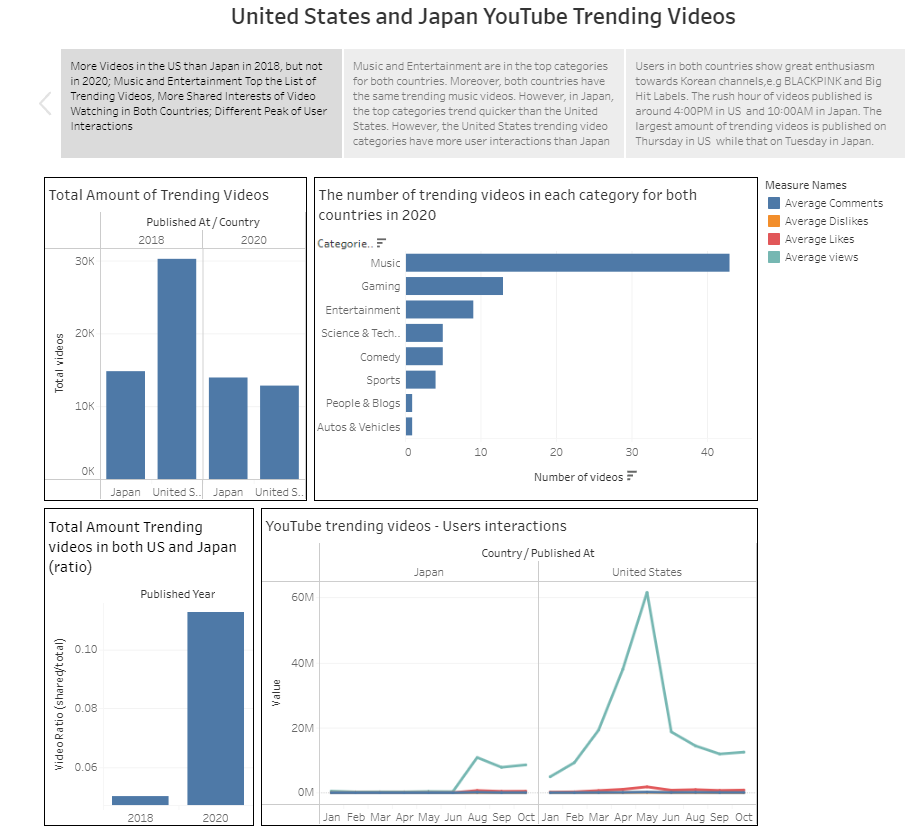

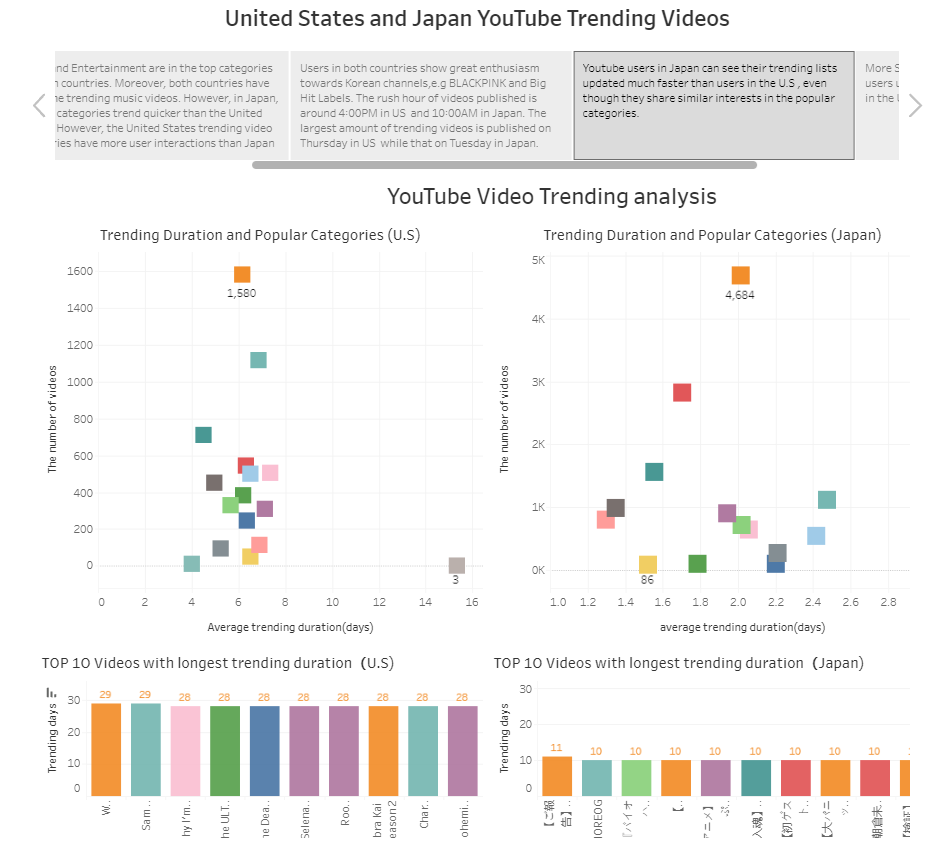

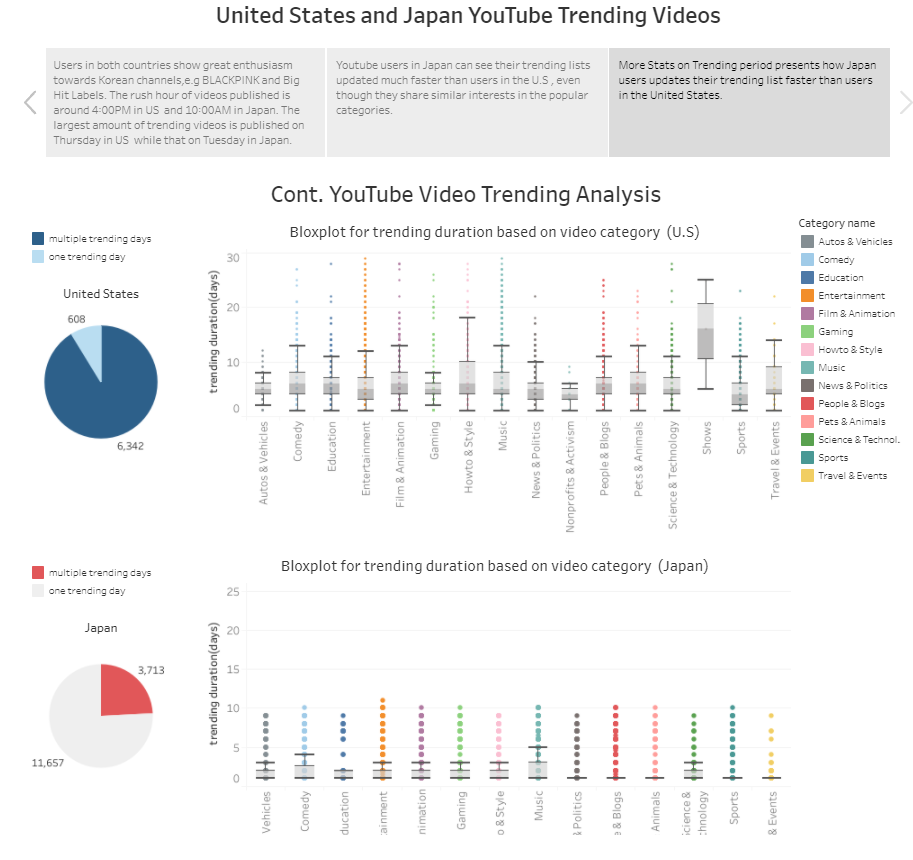

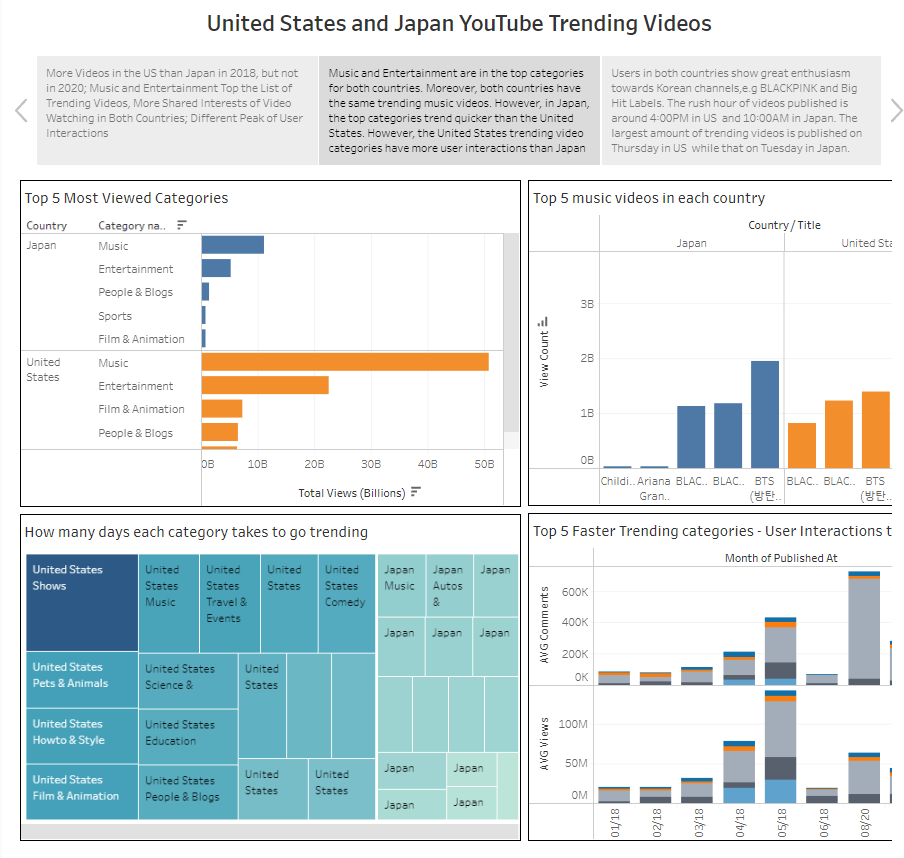

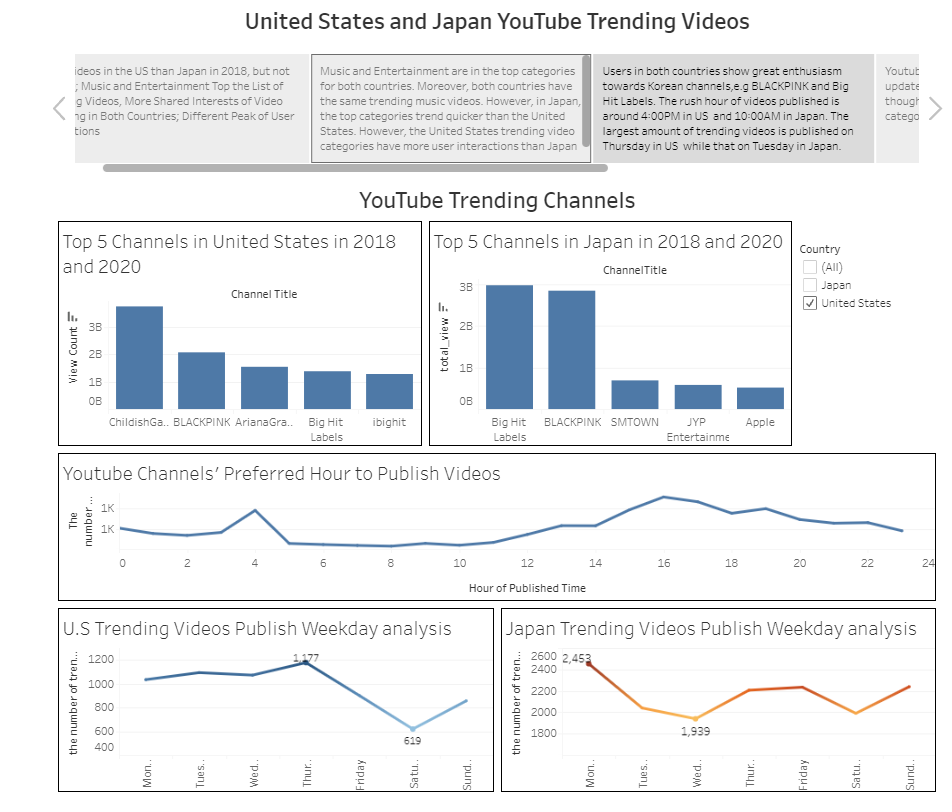